
# Problem Set 1 


**Name : `Radhika Patwari`** 

**Roll-No : `18CS10062`** 



**Dept : `Computer Science and Engineering`** 

**Mail-ID : `rsrkpatwari1234@gmail.com & rsrkiwill@iitkgp.ac.in`** 

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://docs.anaconda.com/anaconda/install/). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their answers to theoretical questions into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it), he/she can write it in pen-and-paper format and submit the scanned pdf. Note that the solutions to the programming problems should be submitted in the ipynb file itself.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: Please upload your completed solution file to [CSE Moodle](https://kgpmoodle.iitkgp.ac.in/moodle/login/index.php) by the due date.


`Vector` stands for `column vector` below.

### Problem 1: Closed-Form Maximum Likelihood

**Q1.1**: The **functional Invariance** Property of Maximum Likelihood Estimate (MLE) states that, "If $\hat{\theta}$ is a Maximum Likelihood Estimate (MLE) of $\theta$ and if $g$ is a function, then $g(\hat{\theta})$ is an MLE of $g(\theta)$".

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from $P(x \ | \ \theta)$ below:

$P(x \ | \ \theta) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

The MLE for the parameter $\theta$ of given distribution is $\frac{\sum_{i=1}^n x_i}{n}$ (already worked out in class). Now, let us consider $v = g(\theta) = (1 - \theta)$. Compute the MLE for the parameter $v$ of the distribution **without directly using the functional invariance property stated above**:

$P(x \ | \ v) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

**Q1.2**: Assume that we are given $2n$ iid samples $(x_1, ..., x_{2n})$ from $P(x \ | \ \theta)$ below. Compute the MLE for the parameter $\theta$ of given distribution.

$P(x \ | \ \theta) = \frac{1}{2} e^{-|x-\theta|}$

_Hint: You may find [sign](https://en.wikipedia.org/wiki/Sign_function) function useful._

**`Solution Q1.1`**

Given , ${v} = g(\theta) = (1 - \theta)$ and $P(x \ | \ v) = \theta^x (1-\theta)^{1-x}$  for $x \in \{0, 1\}$

Assuming ${n}$ iid samples $(x_1,x_2......x_n)$ , $P(x_i \ | \ v) =(1 - v)^{x_i} (v)^{1-x_i}$ for ith sample

Then , $P(x \ | \ v) = (1-v)^{\sum^n_{i=1} x_i}(v)^{n - \sum^n_{i=1} x_i}$

Log likelihood $L(v) = \log P(x \ | \ v) = \sum^n_{i=1} x_i \log(1-v) \ + \ (n - \sum^n_{i=1} x_i) \log(v)$
 
Taking derivative on both sides of above equation, we get 
$$ \ \frac{d(L(v))}{dv} = \frac{-\sum^n_{i=1} x_i}{1-v} \ + \ \frac{(n - \sum^n_{i=1} x_i)}{v}$$

For finding MLE of ${v}$, likelihood should be maximised , thus $$ \ \frac{d(L(v))}{dv} = 0$$

Therefore , $\frac{-\sum^n_{i=1} x_i}{1-v} \ + \ \frac{(n - \sum^n_{i=1} x_i)}{v} = 0$


 => $ \ \ \frac{\sum^n_{i=1} x_i}{1-v} = \frac{(n - \sum^n_{i=1} x_i)}{v}$

 => $ \ \ v \ {\sum^n_{i=1} x_i} = (1-v)(n - \sum^n_{i=1} x_i)$

 => $ \ \ v \ {\sum^n_{i=1} x_i} = n - \sum^n_{i=1}x_i - vn + v\sum^n_{i=1} x_i$

 => $ \ \ vn = n - \sum^n_{i=1}x_i$

 => $ \ \ v = 1 - \frac{\sum^n_{i=1}x_i}{n}$

 For MLE , $ \ \ v = 1 - \frac{\sum^n_{i=1}x_i}{n}$ 

 Hence obtained.


**`Solution Q1.2`**

Given, $P(x_i|\theta) = \frac{1}{2} e^{-|x_i-\theta|}$

Hence for ${2n}$ iid samples $(x_1,x_2.......x_{2n})$ , we have $P(x|\theta) = \frac{1}{2} e^{-\sum_{i=1}^{2n}|x_i-\theta|}$

To obtain Maximum llikelihood estimation of ${\theta}$ , $P(x|\theta)$ should be maximum ,  which implies $\sum_{i=1}^{2n}|x_i-\theta|$ should be minimum

Therefore $\theta$ = median of $(x_1,x_2,........,x_{2n})$ for MLE


### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point $(\mathbf x_i \in \mathbf R^{d})$
- $\theta$ is a $d$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Fisher's Z-distribution}(d_1, d_2)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, d_1, d_2) = Z(d_1, d_2) \frac{e^{d_1(y_i - \theta^T \mathbf{x_i})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)^\frac{d_1+d_2}{2}} $$

where $Z$ stands for a constant that does not depend on $\theta$, and $d_1$ and $d_2$ are constant parameters.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**`Solution Q2.1`**

Log Likelihood for a single sample ${i}$ is $L_i(\theta) = L(\theta |\mathbf x_i,y_i) = log(P(y_i|\mathbf x_i,\theta,d_1,d_2)$

Hence , $L(\theta | x_i,y_i) = log(Z(d_1,d_2)) + d_1 (y_i-\theta^T \mathbf x_i) - (\frac {d_1+d_2} {2} log(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2))$

Taking differential on both the sides of the above equation wrt ${\theta}$, we obtain

$$ \frac{\partial \mathcal L(\theta | x_i,y_i)}{\partial \theta} = -d_1 \mathbf x_i + (\frac {d_1+d_2}{2})\Big(\frac {1} {d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2}\Big) 2d_1e^{2(y_i - \theta^T \mathbf{x_i})} \mathbf x_i$$

Therefore , $$ \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = -d_1 \mathbf x_i + (d_1+d_2)\Big(\frac {d_1e^{2(y_i - \theta^T \mathbf{x_i})}} {d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2}\Big)\mathbf  x_i $$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (7e-2, 1e-3, 1e-6), explain the result. Consider $Z(d_1,d_2)=8$, $d_1=2$ and $d_2=2$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

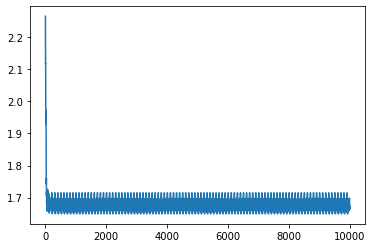

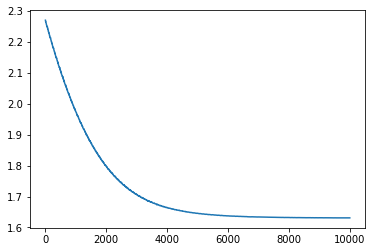

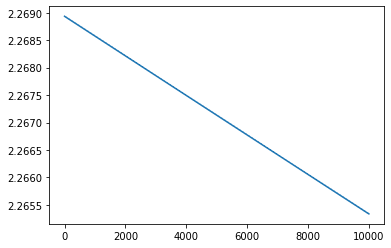

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, d=10, d1=2, d2=2):
    X = np.random.rand(n, d)*2-1
    theta = np.random.rand(d, 1)
    noise = np.random.f(d1, d2, n).reshape((-1, 1))  # F-distribution
    noise = np.log(noise) / 2  # Fisher's Z-distribution
    return X, X @ theta + noise

def loss(X, y, theta):
    ## ! -- code required
    param = 2*(y - np.matmul(X, theta))
    loss_value = np.log(8) + param - 2*np.log(2*np.exp(param) + 2)
    return -np.mean(loss_value)  # negative log likelihood

def loss_grad_i(X, y, theta, i):
    ## ! -- code required
    param1 = 2*(y[i] - np.matmul(X[i], theta))
    param2 = np.exp(param1)/(np.exp(param1)+1)
    loss_value = -2*X[i] + 4*param2*X[i]
    return -loss_value    # derivative of negative log likelihood

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [7e-2, 1e-3, 1e-6]:
        theta = theta_init.copy()
        losses = []
        for step_n in range(n_steps):
            value = 0
            for i in range(X.shape[0]):
                update = loss_grad_i(X, y, theta, i)
                theta_change = learning_rate*update  # minimising negative log likelihood
                theta = theta - np.array([theta_change]).T ## ! -- code required
                loss_i = loss(X, y, theta) ## ! -- code required
                losses.append(loss_i)
        plt.plot(losses)
        plt.show()
    
def main(n=100, d=10, d1=2, d2=1):
    X, y = generate_data(n, d, d1, d2)
    theta_init = np.random.rand(d, 1)
    sgd_plot(theta_init, X, y)
    
main()

**`Solution Q2.2`**

From Q2.1 , we have
Log Likelihood for a single sample ${i}$ as $L_i(\theta) = L(\theta |\mathbf x_i,y_i) = log(P(y_i|\mathbf x_i,\theta,d_1,d_2)$
and

derivative of loss function as 
$$ \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = -d_1 \mathbf x_i + (d_1+d_2)\Big(\frac {d_1e^{2(y_i - \theta^T \mathbf{x_i})}} {d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2}\Big)\mathbf  x_i $$

On noting down the influence of the learning rate in 100 iteration steps, we obtain the above 3 graphs.

1st graph : Learning rate of 7e-2 is too high for the training set. Weight parameter changes very rapidly and overshoots the minima of the loss function. The value of loss keeps oscillating around the minima, as a result the value oscillates within a range of values for any number of iterations and minima is never reached.

2nd graph : Learning rate of 1e-3 is optimal. A smooth curve is obtained indicating decrease in loss with increasing number of iterating steps.Hence SGD reaches minima after certain number of iterations and optimal value of parameters are obtained.

3dr graph : Learning rate of 1e-3 is too less. The change in the value of theta is almost negligible. Hence we obtain a linear function of loss with respect to number of iterations.Thus the function converges very slowly with this value of learning rate.





### Problem 3: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

**`Show that given model definition above, the following holds:`**

**Q3.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function. Do not get confused between standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties) and [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution.
 
 **Hints:** 
 
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

**`Solution Q3.1`**

Given $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$ , $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ and $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$

For a random variable $\epsilon \sim \text{Logistic}(0, \sigma_\epsilon)$ , $P(\epsilon \leq \theta^T \mathbf x_i)$ = $CDF_{\epsilon}(\theta^T \mathbf x_i)$ = $\text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

Considering, $ P(y_i = 1 \ | \ \theta, \mathbf x_i)$

= $ P(\theta^T \mathbf x_i + \varepsilon \geq 0)$

= $ P(\varepsilon \geq -\theta^T \mathbf x_i)$

= $ P(\varepsilon \leq \theta^T \mathbf x_i)$  [since logistic distribution is symmetric]

= $CDF_{\epsilon}(\theta^T \mathbf x_i)$

= $\text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

Therefore , $ P(y_i = 1 \ | \ \theta, \mathbf x_i)$ = $\text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$.Hence Proved

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q3.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**`Solution Q3.2`**

From Q3.1 , we have $ P(y_i = 1 \ | \ \theta, \mathbf x_i)$ = $\text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$ = $\text{logistic}(\theta^T \mathbf x_i)$

For a boolean random vector y , y = {0,1}

Thus, $ P(y_i = 0 \ | \ \theta, \mathbf x_i)$ = 1 - $\text{logistic}(\theta^T \mathbf x_i)$

Therefore $ P(y_i | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$ satisfies the two equations.

Hence proved.

**Q3.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**`Solution Q3.3`**

From Q3.2 , we have $ P(y_i | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$.

Taking logarithm on both the sides of the above equation, we get

$ \log P(y_i | \ \theta, \mathbf x_i) = y_i \log (\text{logistic}(\theta^T \mathbf x_i)) + (1-y_i) \log (1-\text{logistic}(\theta^T \mathbf x_i))$

= $y_i \log \Big(\frac{\exp(\theta^T \mathbf x_i)}{1 + \exp(\theta^T \mathbf x_i)}\Big) + (1-y_i) \log \Big(\frac{1}{1 + \exp(\theta^T \mathbf x_i)}\Big)$

= $y_i \log (\exp(\theta^T \mathbf x_i)) - y_i \log (1 + \exp(\theta^T \mathbf x_i)) + 0 - (1-y_i) \log (1 + \exp(\theta^T \mathbf x_i))$

= $y_i \theta^T \mathbf x_i - y_i \log (1 + \exp(\theta^T \mathbf x_i)) - \log (1 + \exp(\theta^T \mathbf x_i)) + y_i \log (1 + \exp(\theta^T \mathbf x_i))$

= $y_i \theta^T \mathbf x_i - \log (1 + \exp(\theta^T \mathbf x_i))$

Therefore $ \log P(y_i | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log (1 + \exp(\theta^T \mathbf x_i))$. Hence proved

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q3.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**`Solution Q3.4`**

From Q3.3 , we have $ \log P(y_i | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log (1 + \exp(\theta^T \mathbf x_i))$

Now, 
$ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = \sum^n_{i=1} \log P(\mathbf y_i \ | \mathbf x_i, \theta)$

= $\sum^n_{i=1} (y_i \theta^T \mathbf x_i - log(1 + \exp(\theta^T \mathbf x_i)))$

= $y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))$

Therefore , $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) =  y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))$. Hence proved

**Q3.5**: $\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) $




**`Solution Q3.5`**

From Q3.4, we have $ \mathcal L_{MLE}(\theta) =  y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))$

Thus, $\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} = (y^TX)^T - X^T\Big(\frac{exp(X\theta)}{1 + exp(X\theta)}\Big) = X^T(y - \text{logistic}(X\theta)))$

Hence proved.

### Problem 4: Coding Logistic Regression


Here's the code that generates data according to model specification (**Problem 3**). You needn't change it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues)[:, np.newaxis] # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples)[:, np.newaxis]
    y = ((X @ theta_real + noise) > 0).astype(np.int16)
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

**Q4.1**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MLE loss and plot 

- MLE loss
- Decision Boundary (for 2D data)

Use results from **Q3.5**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred to as "the negative log-likelihood".

In [ ]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_loss(X, y, theta_current, lambd):
    param1 = np.matmul(np.matmul(y.T, X), theta_current)
    log_value = np.log(1 + np.exp(np.matmul(X, theta_current)))
    param2 = np.sum(log_value, axis=0, keepdims=True)
    loss = param1 - param2
    return -loss[0,0] ## ! -- code required

def logistic_loss_gradient(X, y, theta_current, lambd):
    param1 = np.matmul(X, theta_current)
    logistic_value = 1/(1+np.exp(-param1))
    gradient = np.matmul(X.T,y - logistic_value)
    return gradient ## ! -- code required

def logistic_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    param = np.matmul(X, theta_current)
    logistic_value = 1/(1+np.exp(-param))
    predicted_value = (logistic_value > 0)
    error = np.sum(np.square(predicted_value - y))/X.shape[0]
    return 1 - error ## ! -- code required

def run_MLE_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        ## ! -- code required
        #print(theta)
        theta_change = learning_rate*logistic_loss_gradient(X, y, theta, lambd)
        theta = theta + theta_change
        steps.append(theta)
    return steps

def run_MLE_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            ## ! -- code required
            theta_change = learning_rate*logistic_loss_single_gradient(X, y, smaple_id, theta, lambd)  # log likelihood
            theta = theta + theta_change  # maximising log likelihood
            pass
        steps.append(theta)
    return steps

**Q4.1.1**: Plot (for 2D data) all the train and test set points and then plot the decision boundary on the same plot  by filling in the missing code below. Clearly indicate the train/test samples and positive/negative samples in the plot using different markers and colors.

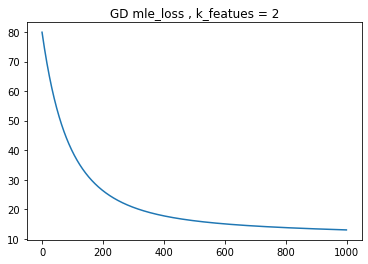

gd runtime: 0.18058337300044514


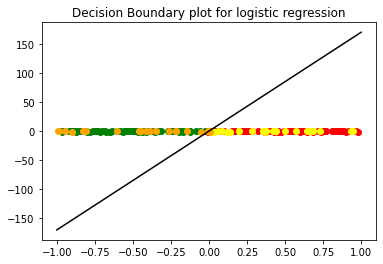

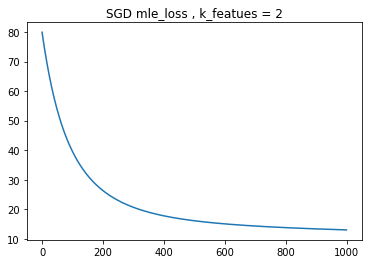

sgd runtime: 2.014836400000604


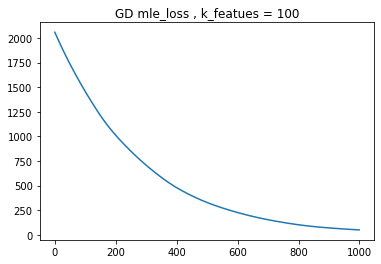

gd runtime: 0.2692761009993774


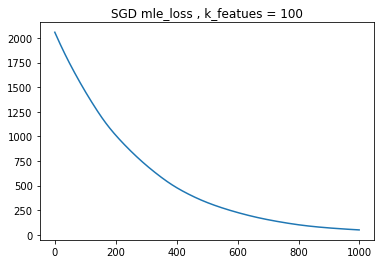

sgd runtime: 2.1793833010005983


In [ ]:
import time

def plot_decision_boundary(X_train, y_train, X_test, y_test, theta):
    ## ! -- code required

    # taking training data points
    train_label_zero = []
    train_label_one = []
    for i in range(X_train.shape[0]):
        if (y_train[i]==0):
            train_label_zero.append(i)
        else:
            train_label_one.append(i)

    # taking testing data points
    test_label_zero = []
    test_label_one = []
    for i in range(X_test.shape[0]):
        if (y_test[i]==0):
            test_label_zero.append(i)
        else:
            test_label_one.append(i)

    # plotting training data points
    plt.scatter(X_train[train_label_one,0], X_train[train_label_one,1], color='red', label='Train points with label 1')
    plt.scatter(X_train[train_label_zero,0], X_train[train_label_zero,1], color='green', label='Train points with label 0')

    # plotting testing data points
    plt.scatter(X_test[test_label_one,0], X_test[test_label_one,1], color='yellow', label='Test points with label 1')
    plt.scatter(X_test[test_label_zero,0], X_test[test_label_zero,1], color='orange', label='Test points with label 0')
    
    xval = np.linspace(-1, 1)
    yval = -theta[0] * xval / theta[1]

    plt.title('Decision Boundary plot for logistic regression')
    plt.plot(xval, yval, 'k-')
    plt.show()
    pass


def main():
    for k_features in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_features, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        lambd = 0
        
        now = time.perf_counter()
        steps = run_MLE_gd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('GD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('gd runtime:', time.perf_counter() - now)

        if k_features == 2:
            ## ! -- code required
            # call plot_decision_boundary() with appropriate arguments
            plot_decision_boundary(X_train, y_train, X_test, y_test, steps[-1])
            pass
        
        now = time.perf_counter()
        steps = run_MLE_sgd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('SGD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('sgd runtime:', time.perf_counter() - now)
        
        plt.show()
    
main()

**Q4.1.2**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Why is SGD slower than GD?

**`Solution Q4.1.2`**

In Gradient Descent, average loss over the entire sample is taken per epoch to update the weight parameters. For the same number of epochs, Stochastic gradient descent computes loss for each sample in one single epoch and update the weight parameters.
Thus for same number of epochs(here 1000) and samples(here 200), SDG perform (1000*200) updation steps of weight parameters and GD performs only 1000 updation steps. Hence convergence in SDG is slower than GD.

.

.

.

Wow, you made it this far. That is impressive. Congratulations!